In [655]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud

# model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import PartialDependenceDisplay

# Download required tokenizer
# nltk.download('punkt')

# Reddit Dataset:

In [656]:
reddit_df = pd.read_csv("./Reddit_API/reddit_api_clean_1.csv")
reddit_df.head()

,id,title,selftext,score,num_comments,upvote_ratio,subreddit,date,time_of_day,year
0,1gln9s2,Is Samsung Falling Behind in Smartphone Camera Innovation?,"Hey everyone,\n\nSo, I’ve been a Samsung user for a while and, as someone who really values smartphone camera quality, I’m honestly starting to feel let down. It feels like Samsung’s been kind of… stagnant when it comes to their camera innovation over the last few years.\n\nIf the rumors about the Galaxy S25 series are true, it looks like they’re only updating the ultra-wide camera hardware while leaving the main and telephoto lenses more or less the same. Meanwhile, I keep seeing reviews and tests where brands like Vivo (X 100/200) and Oppo (X7/8) are coming out with genuinely impressive low-light performance, better clarity, and overall image quality that just outshines Samsung. It’s pretty wild seeing Vivo and Oppo nailing it in areas where Samsung used to be a leader.\n\nAnd honestly, even beyond the hardware, I think Samsung’s post-processing could really use some work. Their current approach often seems to smooth out details too much or oversaturate colors, which doesn’t always look as natural or refined compared to what some other brands are doing. It feels like a missed opportunity Samsung has the resources to fine-tune this but seems content with what’s there.\n\nSo I’m curious, do you guys think Samsung will actually step it up soon, or are they just too focused on other features? I just don’t get why they’re playing it so safe while other brands are clearly pushing the boundaries. Would love to hear if anyone else feels the same way or has thoughts on where Samsung’s headed with their cameras.",348,157,0.91,samsunggalaxy,2024-11-07,Morning,2024
1,1c6ergd,Honest Samsung Galaxy A14 review,"I don't normally give my opinion on things but I'm hoping it might help anyone on the fence about purchasing this particular phone. So I got the A14 a few months back because I was very tight on money at the time but needed a new phone. I have since made the switch to the S-series which I also have a comment on but more on that a little later. So to start the actual review I'd like to share some of the issues I've encountered that seem to be quite common from my research:\n\n1. The mic quality is just straightup trash. If you're someone who likes to call on WhatsApp, Discord or socials similar to those prepare to either make out with your phone for the entire call duration or switch to headphones with their own built in microphones cuz otherwise people on the other end will hear robotic nonsense. There is a ""fix"" to it which is disabling google's microphone permission but it really doesn't make it much better. And I said ""make out"" with your phone because from experience even the smallest distance like having it on the table right in front of you already ruins the quality. Normal calls on the phone app seem to work however or I at the very least haven't heard a single complaint about it.\n\n\n2. Touch sensitivy is horrendous. I've turned off accidental touch protection and turned on increased touch sensitivity and it still chooses to ignore my input when I'm trying to press anything on my phone while it's just lying there (for me that applies mostly to trying to rewind youtube vids or click on the next vid) It really only reacts once I pick up my phone and give it the literal hands on touch. Not to mention if you actually get a screenprotector that hell will double for you.\n\n\n3. The camera. Now to give it some credit it's clearly not the worst and for a budget phone it does do the trick but compared to my previous phone which was from 2016 mind you, it's really barely better. In fact it has such a hard time focusing on a subject compared to the older phone that it feels kind of insulting. The zoom feature makes the image pixely to the point you can't really see what's in it in the first place.\n\n\n4. Restarting the phone takes 7 minutes. I'm not even exaggerating, I timed it

# 1. Data Cleaning & Preprocessing:

## Target Variable: Score

### Data understanding:

In [657]:
# Data types and non-null counts
print("Dataset info")
print(reddit_df.info())

Dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5722 entries, 0 to 5721
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5722 non-null   object 
 1   title         5722 non-null   object 
 2   selftext      5554 non-null   object 
 3   score         5722 non-null   int64  
 4   num_comments  5722 non-null   int64  
 5   upvote_ratio  5722 non-null   float64
 6   subreddit     5722 non-null   object 
 7   date          5722 non-null   object 
 8   time_of_day   5722 non-null   object 
 9   year          5722 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 447.2+ KB
None


In [658]:
# data rows and columns
print("Dataset shape")
print(reddit_df.shape)

Dataset shape
(5722, 10)


In [659]:
# summary of number columns
print("Describe Statistics")
print(reddit_df.describe())

Describe Statistics
              score  num_comments  upvote_ratio         year
count   5722.000000   5722.000000   5722.000000  5722.000000
mean     121.611325     56.175813      0.798182  2023.066760
std      412.354725    118.371381      0.202418     2.066813
min        0.000000      0.000000      0.080000  2018.000000
25%        1.000000      3.000000      0.690000  2022.000000
50%        7.000000     12.000000      0.860000  2024.000000
75%       67.000000     57.000000      0.960000  2025.000000
max    14149.000000   2362.000000      1.000000  2025.000000


In [ ]:
# summary of categorical columns
print("Describe Statistics include object type")
reddit_df.describe(include=["object"])

Describe Statistics include object type


,id,title,selftext,subreddit,date,time_of_day
count,5722,5722,5554,5722,5722,5722
unique,5722,5658,5445,3,1722,4
top,1gln9s2,Weekly iOS Battery Support Megathread,"\n\n**General advice for those concerned about their battery from the Support FAQ Wiki:**\n\n**Battery health**\n\nBattery health depends on usage and a variety of other factors. It is normal to see a decrease in battery health by 7-10% per year, resulting in a battery health of 80-85% after 2 years. This number can fluctuate, remain the same, or decrease quickly over a small period and should not cause undue concern.\n\nApple recommend battery replacement when your device falls below 80% battery health if you notice reduced battery life. If it falls below 80% within the first year you may be eligable for a free battery replacement. It fails after your warranty, it's a $69-$89 USD replacement cost for a battery. Contact Apple Support [here](https://getsupport.apple.com/solutions).\n\nYou can find more information about battery health and performance from Apple [here](https://support.apple.com/en-gb/HT208387).\n\nYou can check the cycles count with [Coconut Battery for Mac](https://coconut-flavour.com/coconutbattery/) or [iCopyBot for Windows](https://www.icopybot.com/download.htm).\n\n​\n\n**Battery life**\n\nIssues relating to battery life can be categorised in three ways:\n\n1. Normal battery life that is to be expected due to use\n2. Reduced battery life caused by a recent update, iOS indexing, an iOS bug, or a third-party application\n3. Reduced battery life, or other abnormalities such as overheating or sudden power-off, caused by device or battery aging\n\nIf you experience issues with your battery:\n\n1. Check your battery health. If it is below 80% or you are experiencing issues you suspect are related to device or battery age, see [Apple Support](https://support.apple.com/).\n2. If you have a new or recently updated/restored device, wait a number of days for background process to complete. If you continue to have issues, wait for a further iOS update. If you are on iOS Beta, you can expect to have a decreased battery life.\n3. Review the advice below on [maximising battery life](https://www.apple.com/uk/batteries/maximizing-performance)\n4. Consider restoring your device.\n5. If issues persist, contact [Apple Support](https://support.apple.com/).\n\n​\n\n[Maximising battery life](https://www.apple.com/uk/batteries/maximizing-performance) \- the amount of time your device runs before it needs to be recharged.\n\n* Use low power mode (This reduces mail fetch, turns off background app refresh and increases the auto lock timer)\n* Remove apps from background app refresh\n* Ensure auto lock is on\n* Turn off auto brightness and manually reduce brightness\n* Use dark mode if your device has an OLED display\n* Clearing background apps from the app switcher does not improve battery life\n\n​\n\n[Maximising battery lifespan](https://www.apple.com/uk/batteries/maximizing-performance/) \- the amount of time your battery lasts until it needs to be replaced.\n\n* Avoid extreme temperatures\n* If you notice that your iPhone gets hot when charging, remove it from its case\n* Store your iPhone in a cool place, switched off, and half-charged if not using it for long periods - and charge it every 6 months when in storage",GooglePixel,2025-03-24,Night
freq,1,45,45,2372,60,1735


In [661]:
# attributes of dataset
print("Describe columns")
print(reddit_df.columns)

Describe columns
Index(['id', 'title', 'selftext', 'score', 'num_comments', 'upvote_ratio',
       'subreddit', 'date', 'time_of_day', 'year'],
      dtype='object')


In [662]:
# datatypes of each attributes
print("Describe Column Types ")
print(reddit_df.dtypes)

Describe Column Types 
id               object
title            object
selftext         object
score             int64
num_comments      int64
upvote_ratio    float64
subreddit        object
date             object
time_of_day      object
year              int64
dtype: object


### Additional Columns:

In [ ]:
# Categorize score into 4 bins: Very Low, Low, Medium, High
bins = [-1, 1, 7, 67, reddit_df["score"].max()]
labels = ["Very Low", "Low", "Medium", "High"]

reddit_df["score_category"] = pd.cut(reddit_df["score"], bins=bins, labels=labels)

### Missing Values:

In [ ]:
# checking for null values in the two remaining columns in the primary dataset
missing_values = reddit_df.isnull().sum()  # count of missing values
print("Missing Values:")
print(missing_values)

# calculate the missing value ratio
missing_ratio = reddit_df.isnull().mean()
print("Missing Value Ratio:")
print(missing_ratio)

print(
    "Data is not missing very much data based on the ratio, dataset is almost fully populated, choosing to remove the small number of records with null values to get a clean dataset"
)

# remove null values
reddit_df = reddit_df.dropna().reset_index(drop=True)
reddit_df.isna().sum()

Missing Values:
id                  0
title               0
selftext          168
score               0
num_comments        0
upvote_ratio        0
subreddit           0
date                0
time_of_day         0
year                0
score_category      0
dtype: int64
Missing Value Ratio:
id                0.00000
title             0.00000
selftext          0.02936
score             0.00000
num_comments      0.00000
upvote_ratio      0.00000
subreddit         0.00000
date              0.00000
time_of_day       0.00000
year              0.00000
score_category    0.00000
dtype: float64
Data is not missing very much data based on the ratio, dataset is almost fully populated, choosing to remove the small number of records with null values to get a clean dataset


id                0
title             0
selftext          0
score             0
num_comments      0
upvote_ratio      0
subreddit         0
date              0
time_of_day       0
year              0
score_category    0
dtype: int64

### Duplicated Values:

In [ ]:
print("The number of duplicates :")
print(reddit_df.duplicated().sum())
print("*********** No duplicates Found ***********")

The number of duplicates :
0
*********** No duplicates Found ***********


### Text preprocessing:

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))


def clean_text(text):

    # lowercase the text
    text = str(text).lower()

    # remove special characters and digits
    text = re.sub(r"[^a-z\s]", "", text)

    # tokenize the text
    tokens = text.split()

    # Remove stop words and lemmatize the remaining tokens
    clean_tokens = [
        lemmatizer.lemmatize(word) for word in tokens if word not in stop_words
    ]

    # Join tokens back into a single string
    cleaned_text = " ".join(clean_tokens)

    return cleaned_text


# clean the text inside the content and create new column to store it
reddit_df["clean_title"] = reddit_df["title"].apply(clean_text)
reddit_df["clean_selftext"] = reddit_df["selftext"].apply(clean_text)

reddit_clean_df = reddit_df.drop(columns=["title", "selftext"], axis=1)

### Additional columns: number of sentences, words and characters for title & selftext:

In [ ]:
# additional columns: number of sentences, words and characters for title
reddit_clean_df["num_characters_title"] = reddit_df["clean_title"].apply(len)
reddit_clean_df["num_words_title"] = reddit_df["clean_title"].apply(
    lambda x: len(nltk.word_tokenize(x))
)
reddit_clean_df["num_sentences_title"] = reddit_df["clean_title"].apply(
    lambda x: len(nltk.sent_tokenize(x))
)

# additional columns: number of sentences, words and characters for selftext
reddit_clean_df["num_characters_selftext"] = reddit_df["clean_selftext"].apply(len)
reddit_clean_df["num_words_selftext"] = reddit_df["clean_selftext"].apply(
    lambda x: len(nltk.word_tokenize(x))
)
reddit_clean_df["num_sentences_selftext"] = reddit_df["clean_selftext"].apply(
    lambda x: len(nltk.sent_tokenize(x))
)

In [669]:
reddit_clean_df.to_csv("clean_transform_reddit.csv", index=False)

# 2. EDA & Visualization:

### Correlation matrix:

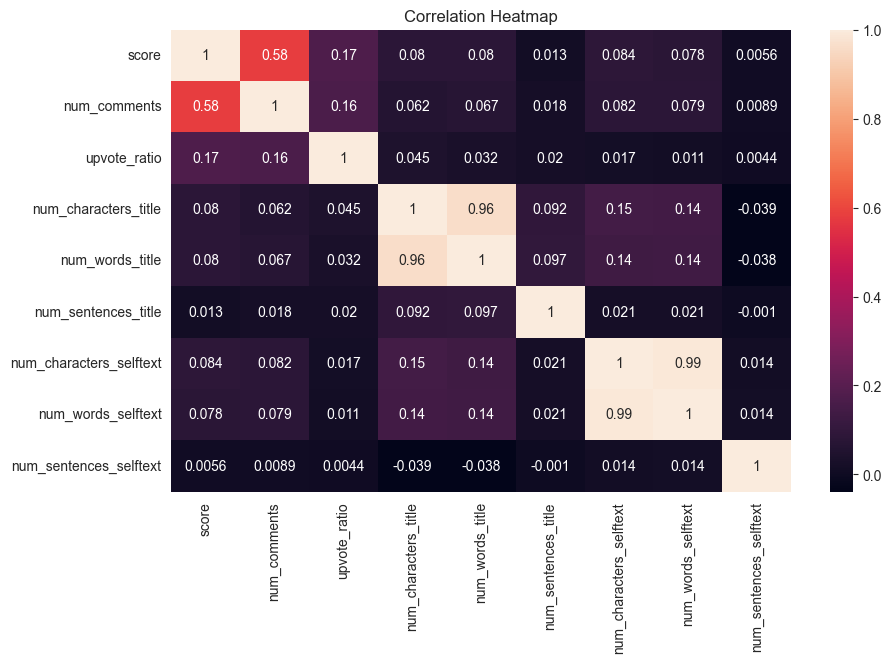

In [ ]:
### Correlation matrix:
df_numeric = reddit_clean_df.drop(columns="year").select_dtypes(include="number")
plt.figure(figsize=(10, 6))

sns.heatmap(df_numeric.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

A correlation of 0.58 between num_comments and score suggests that as one variable increases, the other tends to increase as well. It's a moderately strong correlation (ie much higher than 0), but not as strong as a high correlation which would be closer to 1. The correlation coefficient of 0.58 indicates that there is a degree of predictability between the two variables, but other factors or noise in the data might influence the relationship.  So the data suggests that when users provide a comment the also have a tendence to issue a 'like'.  This also suggest higher engagement levels for certain posts which results in increased visiblility which creates more posts leading to the possible greater association.


### Distribution of subreddit:

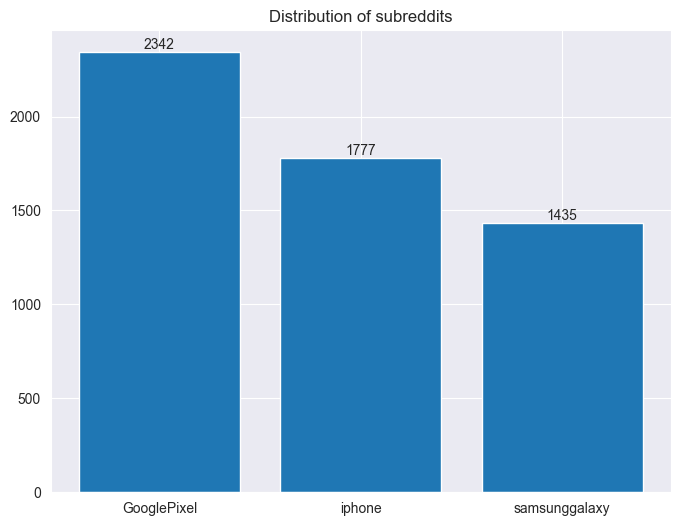

In [ ]:
plt.figure(figsize=(8, 6))

container_bar = plt.bar(
    reddit_df["subreddit"].value_counts().index, reddit_df["subreddit"].value_counts()
)

plt.bar_label(container_bar)
plt.title(f"Distribution of subreddits")
plt.show()

Distribution Chart
The distribution totals by Phone category shows that Google Pixel users have the highest reddit posts while samsung phone users have the least (63.2% higher).  The combination of an engaged user base, constant product updates each time a Pixel is released the reddit platform has user jumping on and giving there opinions, high-quality features (especially in photography and AI) lead to greater sharing through reddit posts, and an active community of enthusiasts and troubleshooters likely leads to Google Pixel having a large number of posts on Reddit. Reddit has a dedicated google page, https://www.reddit.com/r/GooglePixel/, as well as a dedicated android page https://www.reddit.com/r/Android/, which keeps users engaged and excited to share their experiences, problems, and tips increasing their total posts


### Trends across phone brands:

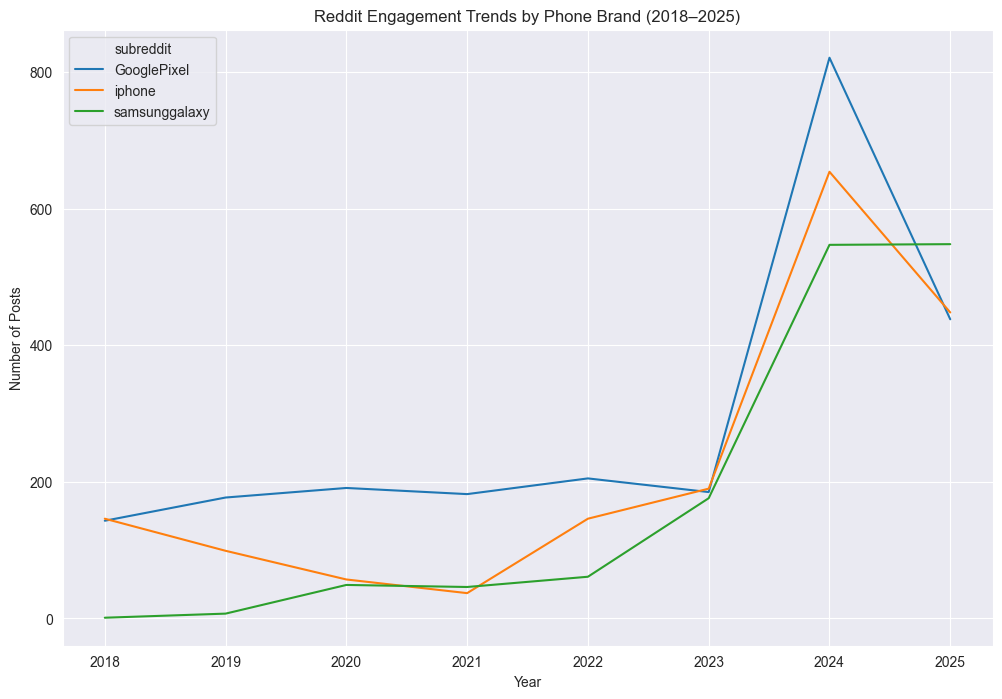

In [ ]:
subreddit_trends = reddit_df.groupby(["subreddit", "year"])["id"].count().reset_index()
subreddit_trends.pivot(index="year", columns="subreddit", values="id").plot(
    figsize=(12, 8)
)
plt.title("Reddit Engagement Trends by Phone Brand (2018–2025)")
plt.ylabel("Number of Posts")
plt.xlabel("Year")
plt.show()

During 2018-2022 the three phones shows post relatively flat. This could be because of the lack of major product innovations, combined with factors like the pandemic where people had to stay home which led to fewer posts about phones. The smartphone market may have matured which maked users less likely to post or engage in discussions about phones. The introduction of exciting new technologies like 5G adoption and AI integration into smartphones, influencer-driven content, and coming out of the pandemic likely sparked renewed interest in phones, leading to a sharp increase in posts as shown in the chart. New software functionality and technology ecosystem integration with Google could have have made their devices central hubs for personal technology ecosystems (iPhone integrates with Apple Watch, AirPods, and iCloud and Google integrates the Pixel with Nest, Google Home, and Wear OS). This device ecosystem integration has made users more engaged with their devices and motivated them to post more about their experiences, troubleshooting, and the features that come with these ecosystems.

# 3. Dimensionality Reduction:

### Low variance filter:

In [ ]:
print(reddit_clean_df.select_dtypes(include="number").var())

score                      1.338755e+05
num_comments               1.279748e+04
upvote_ratio               4.104155e-02
year                       4.257226e+00
num_characters_title       4.183860e+02
num_words_title            9.068464e+00
num_sentences_title        2.873025e-03
num_characters_selftext    1.851990e+06
num_words_selftext         3.629623e+04
num_sentences_selftext     3.600360e-04
dtype: float64


- I will drop num_sentences_title because it is very low variance => almost every title is 1 sentence.
- I also drop num_senetences_selftext because of its low variance which not much distinguishing power.

In [ ]:
reddit_clean_df = reddit_clean_df.drop(
    columns=["num_sentences_selftext", "num_sentences_title"], axis=1
)

### High correlation filter

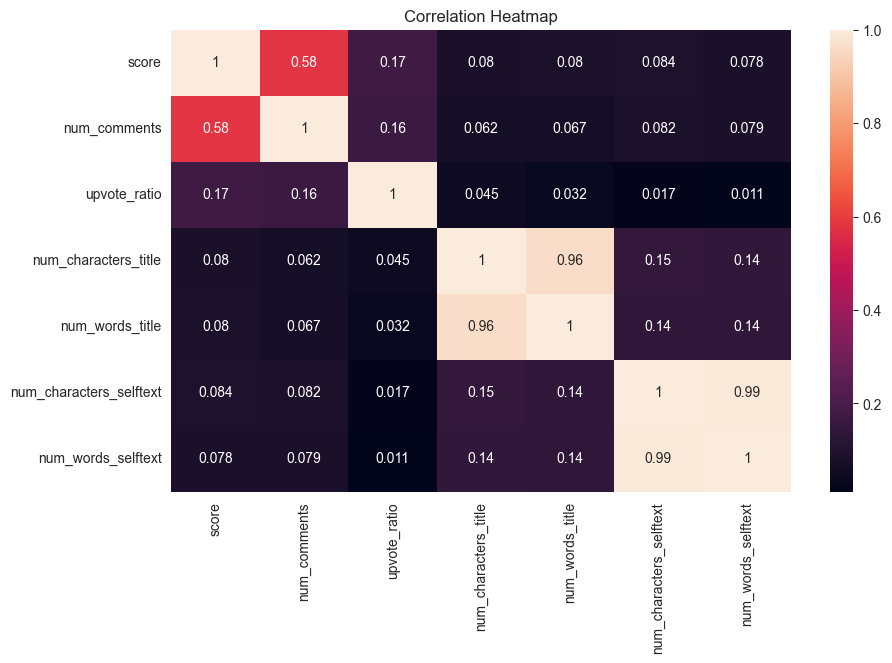

In [ ]:
plt.figure(figsize=(10, 6))

sns.heatmap(
    reddit_clean_df.drop(columns="year").select_dtypes(include="number").corr(),
    annot=True,
)
plt.title("Correlation Heatmap")
plt.show()

- num_word and num_characters have high correlation so I will delete one of them

In [ ]:
reddit_clean_df = reddit_clean_df.drop(
    columns=["num_characters_selftext", "num_characters_title"], axis=1
)

### Backward Feature Elimination

In [ ]:
X = reddit_clean_df.drop(columns=["year", "score"]).select_dtypes(include="number")
y = reddit_clean_df["score"]

linreg = LinearRegression()
rfe = RFE(linreg, n_features_to_select=3)
rfe = rfe.fit(X, y)
x_rfe = X[X.columns[rfe.support_]]
x_rfe.columns

Index(['num_comments', 'upvote_ratio', 'num_words_title'], dtype='object')

### - num_comments, upvote_ratio and num_words_title are our 3 most features important.


# 4. Sentiment Analysis:

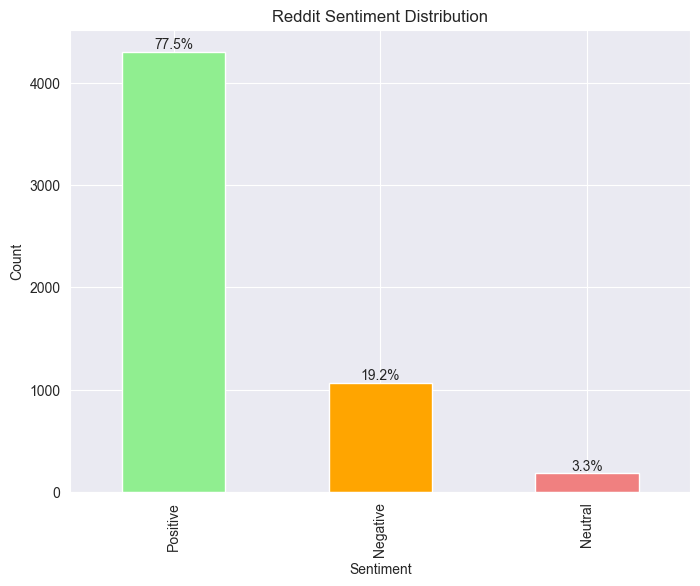

In [ ]:
# Define sentiment analysis function
def analyze_sentiment(selftext):
    blob = TextBlob(selftext)
    sentiment = blob.sentiment.polarity

    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"


# Apply sentiment analysis to 'selftext' column
reddit_clean_df["sentiment"] = (
    reddit_clean_df["clean_selftext"].fillna("").apply(analyze_sentiment)
)

# Count occurrences of each sentiment value
sentiment_counts = reddit_clean_df["sentiment"].value_counts()

# Calculate the percentage of each sentiment
sentiment_percentages = sentiment_counts / sentiment_counts.sum() * 100

# Create a bar chart with percentages displayed on the bars
plt.figure(figsize=(8, 6))
ax = sentiment_counts.plot(kind="bar", color=["lightgreen", "orange", "lightcoral"])

# Add percentages on top of the bars
for i, v in enumerate(sentiment_counts):
    ax.text(
        i, v + 0.05, f"{sentiment_percentages.iloc[i]:.1f}%", ha="center", va="bottom"
    )

# Set labels and title
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Reddit Sentiment Distribution")

# Display the chart
plt.show()

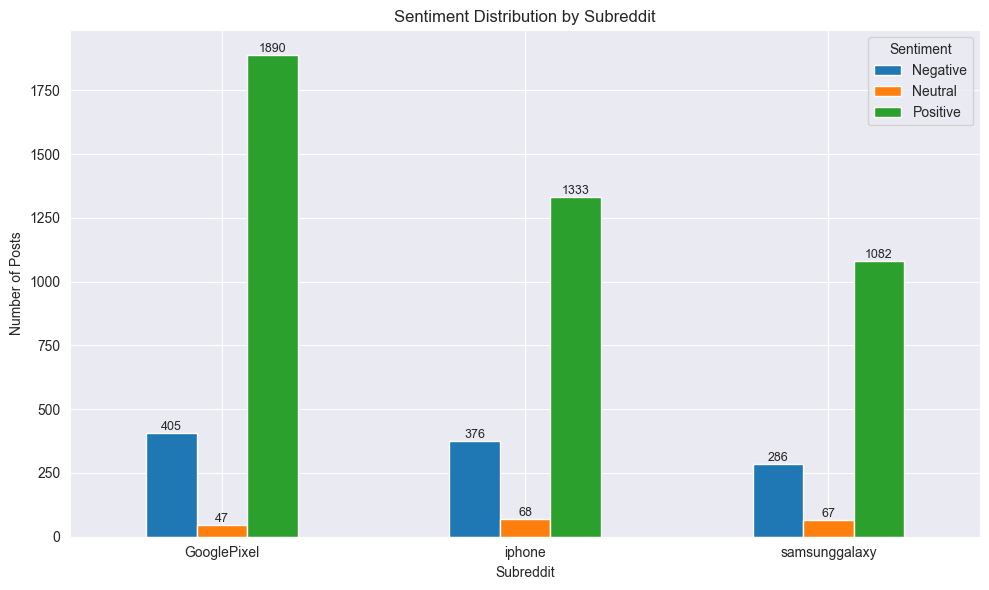

In [ ]:
sentiment_phones = (
    reddit_clean_df.groupby(["subreddit", "sentiment"])["id"].count().reset_index()
)
sentiment_phones = pd.pivot_table(
    sentiment_phones, values="id", index="subreddit", columns="sentiment"
)


ax = sentiment_phones.plot(kind="bar", figsize=(10, 6))

# Add data labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type="edge", fontsize=9)

plt.title("Sentiment Distribution by Subreddit")
plt.xlabel("Subreddit")
plt.ylabel("Number of Posts")
plt.xticks(rotation=0)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

# 5. WordCloud:

### WordCloud for GooglePixel

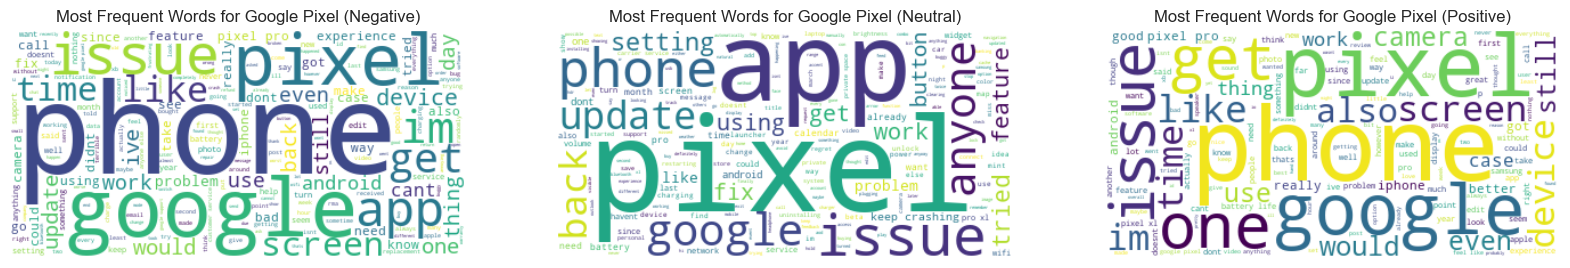

In [ ]:
# Create a word cloud for the google pixel negative sentiment
google_negative = " ".join(
    reddit_clean_df[
        (reddit_clean_df["subreddit"] == "GooglePixel")
        & (reddit_clean_df["sentiment"] == "Negative")
    ]["clean_selftext"]
)
wordcloud_google_negative = WordCloud(
    stopwords=stop_words, background_color="white"
).generate(google_negative)

# Create a word cloud for the google pixel neutral sentiment
google_neutral = " ".join(
    reddit_clean_df[
        (reddit_clean_df["subreddit"] == "GooglePixel")
        & (reddit_clean_df["sentiment"] == "Neutral")
    ]["clean_selftext"]
)
wordcloud_google_neutral = WordCloud(
    stopwords=stop_words, background_color="white"
).generate(google_neutral)

# Create a word cloud for the google pixel neutral sentiment
google_positive = " ".join(
    reddit_clean_df[
        (reddit_clean_df["subreddit"] == "GooglePixel")
        & (reddit_clean_df["sentiment"] == "Positive")
    ]["clean_selftext"]
)
wordcloud_google_positive = WordCloud(
    stopwords=stop_words, background_color="white"
).generate(google_positive)

# Plot both word clouds side by side
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_google_negative, interpolation="bilinear")
plt.title("Most Frequent Words for Google Pixel (Negative)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_google_neutral, interpolation="bilinear")
plt.title("Most Frequent Words for Google Pixel (Neutral)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_google_positive, interpolation="bilinear")
plt.title("Most Frequent Words for Google Pixel (Positive)")
plt.axis("off")

plt.show()

### WordCloud for iPhone

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

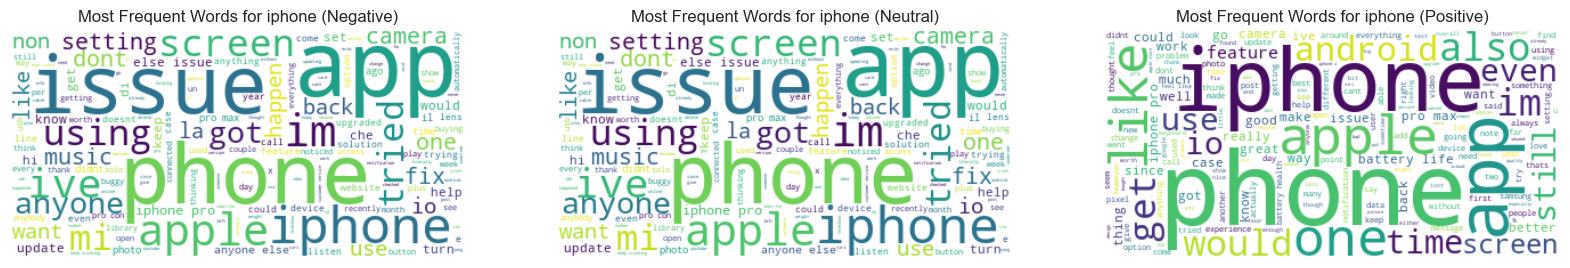

In [ ]:
# Create a word cloud for the iphone negative sentiment
iphone_negative = " ".join(
    reddit_clean_df[
        (reddit_clean_df["subreddit"] == "iphone")
        & (reddit_clean_df["sentiment"] == "Negative")
    ]["clean_selftext"]
)
wordcloud_iphone_negative = WordCloud(
    stopwords=stop_words, background_color="white"
).generate(iphone_negative)

# Create a word cloud for the iphone neutral sentiment
iphone_neutral = " ".join(
    reddit_clean_df[
        (reddit_clean_df["subreddit"] == "iphone")
        & (reddit_clean_df["sentiment"] == "Neutral")
    ]["clean_selftext"]
)
wordcloud_iphone_neutral = WordCloud(
    stopwords=stop_words, background_color="white"
).generate(iphone_neutral)

# Create a word cloud for the iphone neutral sentiment
iphone_positive = " ".join(
    reddit_clean_df[
        (reddit_clean_df["subreddit"] == "iphone")
        & (reddit_clean_df["sentiment"] == "Positive")
    ]["clean_selftext"]
)
wordcloud_iphone_positive = WordCloud(
    stopwords=stop_words, background_color="white"
).generate(iphone_positive)

# Plot both word clouds side by side
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_iphone_neutral, interpolation="bilinear")
plt.title("Most Frequent Words for iphone (Negative)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_iphone_neutral, interpolation="bilinear")
plt.title("Most Frequent Words for iphone (Neutral)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_iphone_positive, interpolation="bilinear")
plt.title("Most Frequent Words for iphone (Positive)")
plt.axis("off")

### WordCloud for Samsung

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

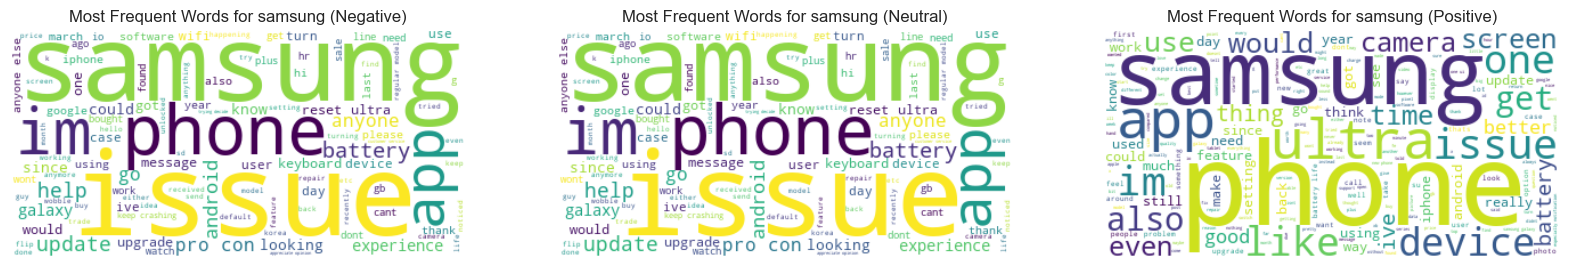

In [ ]:
# Create a word cloud for the iphone negative sentiment
samsung_negative = " ".join(
    reddit_clean_df[
        (reddit_clean_df["subreddit"] == "samsunggalaxy")
        & (reddit_clean_df["sentiment"] == "Negative")
    ]["clean_selftext"]
)
wordcloud_samsung_negative = WordCloud(
    stopwords=stop_words, background_color="white"
).generate(samsung_negative)

# Create a word cloud for the iphone neutral sentiment
samsung_neutral = " ".join(
    reddit_clean_df[
        (reddit_clean_df["subreddit"] == "samsunggalaxy")
        & (reddit_clean_df["sentiment"] == "Neutral")
    ]["clean_selftext"]
)
wordcloud_samsung_neutral = WordCloud(
    stopwords=stop_words, background_color="white"
).generate(samsung_neutral)

# Create a word cloud for the iphone neutral sentiment
samsung_positive = " ".join(
    reddit_clean_df[
        (reddit_clean_df["subreddit"] == "samsunggalaxy")
        & (reddit_clean_df["sentiment"] == "Positive")
    ]["clean_selftext"]
)
wordcloud_samsung_positive = WordCloud(
    stopwords=stop_words, background_color="white"
).generate(samsung_positive)

# Plot both word clouds side by side
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_samsung_neutral, interpolation="bilinear")
plt.title("Most Frequent Words for samsung (Negative)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_samsung_neutral, interpolation="bilinear")
plt.title("Most Frequent Words for samsung (Neutral)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_samsung_positive, interpolation="bilinear")
plt.title("Most Frequent Words for samsung (Positive)")
plt.axis("off")